In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
from chart_studio.plotly import plotly as py
import plotly.graph_objects as go


%matplotlib inline

In [2]:
df_1 = pd.read_csv('finn_appartments_data.csv')
df_2 = pd.read_csv('finn_appartments_data2.csv')
df_3 = pd.read_csv('finn_appartments_data_new.csv')

In [3]:
df = pd.concat([df_1, df_2, df_3]).drop_duplicates().reset_index(drop=True)

In [4]:
df.head()

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler,Faciliteter
0,"SKIPARVIKLIA 11, 5221 Nesttun",5 500 000 kr,24 000 kr,5 524 000 kr,2 500 kr,-1,Leilighet,Eier (Selveier),2,69 m²,72 m²,3,2021,A,Ny Leilighet ved Nordåsvannet med solrik sydve...,-1,NaN
1,"Bjørnsons gate 28 B, 5059 Bergen",890 000 kr,549 927 kr,12 744 kr,1 452 671 kr,4 343 kr,Leilighet,Aksje,18 m²,18 m²,4,1933,477 m² (eiet),-1,"Kronstad - Lekker, nyoppusset studioleilighet....",-1,NaN
2,"Nygårdsgaten 68, 5008 Bergen",3 190 000 kr,8 032 kr,3 198 032 kr,2 471 kr,-1,Leilighet,Andel,2,42 m²,45 m²,5,1890,-1,Rålekker toppleilighet med egen hems. Fasade (...,PrivatMegleren Vikebø & Jørgensen,-1.0
3,"Dag Hammarskjölds vei 55, 5144 Fyllingsdalen",2 550 000 kr,444 207 kr,8 032 kr,3 002 239 kr,5 230 kr,Leilighet,Andel,2,67 m²,70 m²,4,1966,G - rød,Flott 3-roms toppleilighet med egen garasje- v...,Nordvik Bergen,NaN
4,"Grønnegata 7, 0350 Oslo",4 800 000 kr,93 880 kr,131 962 kr,5 025 842 kr,2 715 kr,Leilighet,Eier (Selveier),1,43 m²,43 m²,6,1975,E - rød,HOMANSBYEN - Tiltalende 2-roms selveierleiligh...,Nordvik Bygdøy Allé,NaN


In [5]:
df.shape

(837, 17)

In [6]:
df.dtypes

Address           object
Prisantydning     object
Fellesgjeld       object
Omkostninger      object
Totalpris         object
Felleskost        object
Boligtype         object
Eieform_bolig     object
Soverom           object
Primærrom         object
Bruksareal        object
Etasje            object
Byggeår           object
Energimerking     object
Beskrivelse       object
Eiendomsmegler    object
Faciliteter       object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Address         837 non-null    object
 1   Prisantydning   837 non-null    object
 2   Fellesgjeld     837 non-null    object
 3   Omkostninger    837 non-null    object
 4   Totalpris       837 non-null    object
 5   Felleskost      837 non-null    object
 6   Boligtype       837 non-null    object
 7   Eieform_bolig   837 non-null    object
 8   Soverom         837 non-null    object
 9   Primærrom       837 non-null    object
 10  Bruksareal      837 non-null    object
 11  Etasje          837 non-null    object
 12  Byggeår         837 non-null    object
 13  Energimerking   837 non-null    object
 14  Beskrivelse     837 non-null    object
 15  Eiendomsmegler  837 non-null    object
 16  Faciliteter     308 non-null    object
dtypes: object(17)
memory usage: 111.3+ KB


In [8]:
# check for missing values
df.isna().sum()

Address             0
Prisantydning       0
Fellesgjeld         0
Omkostninger        0
Totalpris           0
Felleskost          0
Boligtype           0
Eieform_bolig       0
Soverom             0
Primærrom           0
Bruksareal          0
Etasje              0
Byggeår             0
Energimerking       0
Beskrivelse         0
Eiendomsmegler      0
Faciliteter       529
dtype: int64

In [9]:
# From the above cell, seems like we don't have any NaN values. 
# This is because I used -1 as my missing values while scraping the data

# convert -1 to NaN
# The reason i am converting all -1 values to NaN in the entire dataset, is simply because I beleive 
# if the dataset has -1 as a real value and not -1 for empty values. This -1 is a corrupt value and still should be 
# replaced with a NaN
df = df.replace('-1', np.NaN)

In [10]:
df.isna().sum()

Address             2
Prisantydning       2
Fellesgjeld       113
Omkostninger      120
Totalpris         128
Felleskost        275
Boligtype           2
Eieform_bolig       2
Soverom             2
Primærrom           3
Bruksareal         75
Etasje             95
Byggeår           103
Energimerking     295
Beskrivelse         2
Eiendomsmegler    260
Faciliteter       547
dtype: int64

<AxesSubplot:>

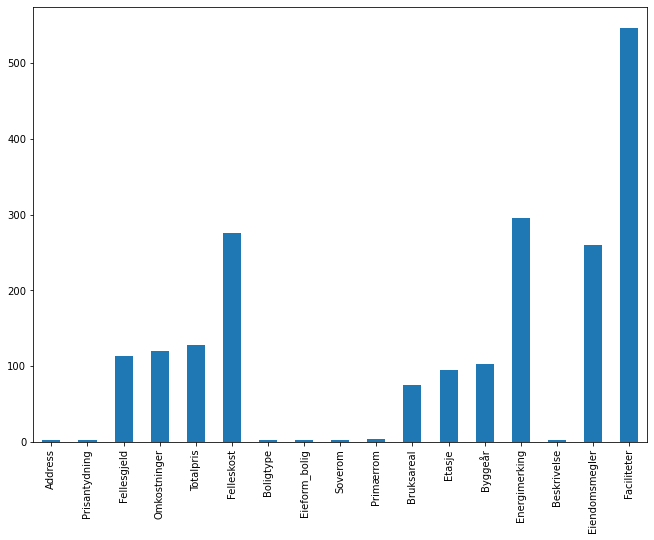

In [11]:
df.isna().sum().plot(kind ='bar', figsize=(11,8))

In [12]:
# drop rows where all values are NaN
df.dropna(how = 'all')

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler,Faciliteter
0,"SKIPARVIKLIA 11, 5221 Nesttun",5 500 000 kr,24 000 kr,5 524 000 kr,2 500 kr,NaN,Leilighet,Eier (Selveier),2,69 m²,72 m²,3,2021,A,Ny Leilighet ved Nordåsvannet med solrik sydve...,NaN,NaN
1,"Bjørnsons gate 28 B, 5059 Bergen",890 000 kr,549 927 kr,12 744 kr,1 452 671 kr,4 343 kr,Leilighet,Aksje,18 m²,18 m²,4,1933,477 m² (eiet),NaN,"Kronstad - Lekker, nyoppusset studioleilighet....",NaN,NaN
2,"Nygårdsgaten 68, 5008 Bergen",3 190 000 kr,8 032 kr,3 198 032 kr,2 471 kr,NaN,Leilighet,Andel,2,42 m²,45 m²,5,1890,NaN,Rålekker toppleilighet med egen hems. Fasade (...,PrivatMegleren Vikebø & Jørgensen,-1.0
3,"Dag Hammarskjölds vei 55, 5144 Fyllingsdalen",2 550 000 kr,444 207 kr,8 032 kr,3 002 239 kr,5 230 kr,Leilighet,Andel,2,67 m²,70 m²,4,1966,G - rød,Flott 3-roms toppleilighet med egen garasje- v...,Nordvik Bergen,NaN
4,"Grønnegata 7, 0350 Oslo",4 800 000 kr,93 880 kr,131 962 kr,5 025 842 kr,2 715 kr,Leilighet,Eier (Selveier),1,43 m²,43 m²,6,1975,E - rød,HOMANSBYEN - Tiltalende 2-roms selveierleiligh...,Nordvik Bygdøy Allé,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,"Dronningens gate 12, 0152 Oslo",4 590 000 kr,1 631 kr,124 789 kr,4 716 420 kr,3 642 kr,Leilighet,Eier (Selveier),1,52 m²,55 m²,3,1939,G - mørkegrønn,Lys og tiltalende 2-roms selveierleilighet m/ ...,Schala & Partners Grünerløkka,NaN
833,"Apanesveien 85, 9512 Alta",2 250 000 kr,325 683 kr,6 632 kr,2 582 315 kr,5 175 kr,Leilighet,Andel,1,61 m²,65 m²,1,2006,D - oransje,"VISNING 28/6, KL.17.30-APANES: Velholdt og mod...",NaN,NaN
834,"Eliasmarken 14, 5164 Laksevåg",2 500 000 kr,43 416 kr,1 132 kr,2 544 548 kr,5 369 kr,Leilighet,Andel,3,79 m²,79 m²,3,1969,G - rød,"Stor og flott 4-roms leilighet med vestvendt, ...",Krogsveen avd. Bergen Vest,NaN
835,"Engrappveien 27, 4327 Sandnes",2 948 000 kr,NaN,NaN,NaN,NaN,60 - 94 m²,2,3,Leilighet,Eier (Selveier),B - rød,NaN,NaN,Øygarden Hana/Austrått - unngå ny varslet pris...,OBOS Block Watne AS,-1.0


In [13]:
# get all the apparments with missing address
df[df['Address'].isna()]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler,Faciliteter
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN


In [14]:
# I will remove all the cells that has less than 11 non NaN values 
df.dropna(thresh = 10, inplace = True)
df.shape

(760, 17)

In [15]:
df.isna().sum()

Address             0
Prisantydning       0
Fellesgjeld        36
Omkostninger       43
Totalpris          51
Felleskost        198
Boligtype           0
Eieform_bolig       0
Soverom             0
Primærrom           0
Bruksareal          0
Etasje             24
Byggeår            26
Energimerking     218
Beskrivelse         0
Eiendomsmegler    246
Faciliteter       541
dtype: int64

In [16]:
df['Faciliteter'].value_counts()

-1.0                  179
['¤¤¤¤¤¤¤¤¤¤¤']         9
['¤¤¤¤¤¤¤¤']            5
['¤¤¤¤¤¤¤']             5
['¤¤¤¤¤¤']              4
['¤¤¤¤']                3
['¤¤¤¤¤¤¤¤¤¤']          3
['¤¤¤¤¤']               3
['¤¤¤¤¤¤¤¤¤¤¤¤¤']       2
['¤¤¤¤¤¤¤¤¤']           2
['¤¤¤']                 2
['¤¤¤¤¤¤¤¤¤¤¤¤']        1
['¤¤¤¤¤¤¤¤¤¤¤¤¤¤']      1
Name: Faciliteter, dtype: int64

In [17]:
# removing the Faciliteter from the dataframe, the columns wasn't scraped correctly
df = df.drop('Faciliteter', axis = 1)

In [18]:
df.columns

Index(['Address', 'Prisantydning', 'Fellesgjeld', 'Omkostninger', 'Totalpris',
       'Felleskost', 'Boligtype', 'Eieform_bolig', 'Soverom', 'Primærrom',
       'Bruksareal', 'Etasje', 'Byggeår', 'Energimerking', 'Beskrivelse',
       'Eiendomsmegler'],
      dtype='object')

<AxesSubplot:>

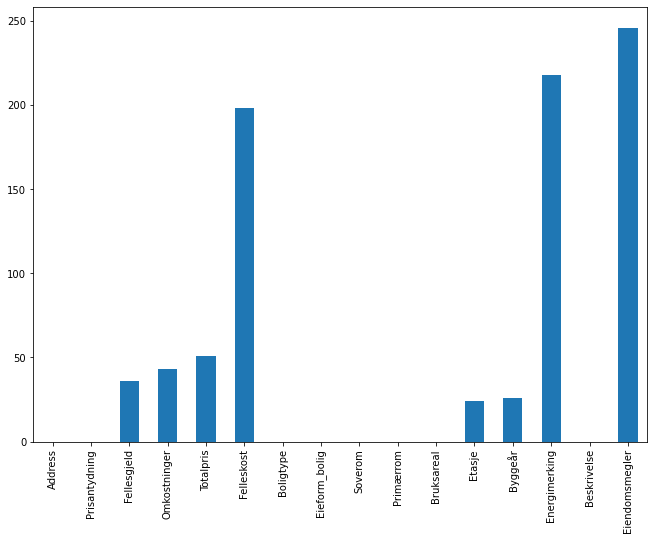

In [19]:
df.isna().sum().plot(kind ='bar', figsize=(11,8))

In [20]:
# check if we still have duplicates, using Address
df['Address'].value_counts()

Bjerregaards gate 19, 0172 Oslo                                                        3
Gamle Kirkevei 3J, 1617 Fredrikstad                                                    2
Mosseveien 69, 1610 Fredrikstad                                                        2
Dragen 5, 2165 Hvam                                                                    2
Tokerudberget 5, 0986 Oslo                                                             2
                                                                                      ..
Huitfeldts gate 15, 0253 Oslo                                                          1
Koboltveien 16, 4629 Kristiansand S                                                    1
Konggata 53B, 3019 Drammen                                                             1
Gartnerkvartalet hus 8, Villvin boligsameie Lørenvangen 23 B, leil. 8606, 0585 Oslo    1
Ødegårds vei 20, 1470 Lørenskog                                                        1
Name: Address, Length

In [21]:
# 
filt = (df['Address'] == 'Bjerregaards gate 19, 0172 Oslo')
display(df.loc[filt])

filt = (df['Address'] == 'Dragen 5, 2165 Hvam')
display(df.loc[filt])


,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
83,"Bjerregaards gate 19, 0172 Oslo",3 490 000 kr,114 000 kr,15 526 kr,3 619 526 kr,3 571 kr,Leilighet,Andel,1,31 m²,39 m²,5,1961,G - mørkegrønn,Stilren & lys toppleil. med en fantastisk inng...,Nordvik Ullevål
134,"Bjerregaards gate 19, 0172 Oslo",3 350 000 kr,223 000 kr,8 626 kr,3 581 626 kr,3 571 kr,Leilighet,Andel,0,31 m²,39 m²,4.0,1960,C - mørkegrønn,Lys og luftig leilighet sentralt på St. Hansha...,Krogsveen avd. Majorstuen
154,"Bjerregaards gate 19, 0172 Oslo",3 350 000 kr,223 000 kr,8 626 kr,3 581 626 kr,3 571 kr,Leilighet,Andel,0,31 m²,39 m²,4.0,1960,C - mørkegrønn,Lys og luftig leilighet sentralt på St. Hansha...,NaN


,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
135,"Dragen 5, 2165 Hvam",3 100 000 kr,78 842 kr,3 178 842 kr,1 704 kr,11 847 kr per år,Leilighet,Eier (Selveier),2,69 m²,71 m²,2.0,2018,C - rød,Lekker 3-roms eierleilighet med god planløsnin...,Krogsveen avd. Jessheim
155,"Dragen 5, 2165 Hvam",3 100 000 kr,78 842 kr,3 178 842 kr,1 704 kr,11 847 kr per år,Leilighet,Eier (Selveier),2,69 m²,71 m²,2.0,2018,C - rød,Lekker 3-roms eierleilighet med god planløsnin...,NaN


In [22]:
# appartment at index 134 and 154 are the same, but the one at index 156 is missing Eiendomsmegler, I will drop appartment 
# that are identical without Eiendomsmegler

#display(df.sort_values('Eiendomsmegler'))

df = df.sort_values('Eiendomsmegler').drop_duplicates(subset = ['Address', 'Prisantydning', 'Fellesgjeld', 'Omkostninger', 'Totalpris',
       'Felleskost', 'Boligtype', 'Eieform_bolig', 'Soverom', 'Primærrom',
       'Bruksareal', 'Etasje', 'Byggeår', 'Energimerking', 'Beskrivelse'], keep='first')

In [23]:
filt = (df['Address'] == 'Bjerregaards gate 19, 0172 Oslo')
display(df.loc[filt])

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
134,"Bjerregaards gate 19, 0172 Oslo",3 350 000 kr,223 000 kr,8 626 kr,3 581 626 kr,3 571 kr,Leilighet,Andel,0,31 m²,39 m²,4.0,1960,C - mørkegrønn,Lys og luftig leilighet sentralt på St. Hansha...,Krogsveen avd. Majorstuen
83,"Bjerregaards gate 19, 0172 Oslo",3 490 000 kr,114 000 kr,15 526 kr,3 619 526 kr,3 571 kr,Leilighet,Andel,1,31 m²,39 m²,5,1961,G - mørkegrønn,Stilren & lys toppleil. med en fantastisk inng...,Nordvik Ullevål


In [24]:
filt = (df['Byggeår'].isna())
df_NaN_Byggeår = df.loc[filt]

In [25]:
df_NaN_Byggeår.head(26)

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
496,"Nørvegen 32, 7380 Ålen",550 000 kr,169 737 kr,8 032 kr,727 769 kr,5 869 kr,Leilighet,Andel,59 m²,59 m²,Eiet,Ja,NaN,NaN,Praktisk endeleilighet i 2. etg med sentral be...,Aktiv Trondheim
561,"Smaleråsa, 6770 Nordfjordeid",3 895 000 kr,NaN,NaN,NaN,NaN,100 m²,3,Leilighet,Eier (Selveier),B,NaN,NaN,NaN,Sentrumsnære leilegheiter i nedre del av Hogaå...,BoligPartner - Din Bustad AS
533,"Landboden 51-63, 5200 Os",2 700 000 kr,NaN,NaN,NaN,NaN,48 - 127 m²,1 - 3,Leilighet,Eier (Selveier),B - mørkegrønn,NaN,NaN,NaN,Elveportalen - 33 prosjekterte leiligheter lan...,Fana Sparebank Eiendom
787,"Kjellengveien 30, 3125 Tønsberg",4 600 000 kr,NaN,NaN,NaN,NaN,83 m²,2,2,Leilighet,Eier (Selveier),A - gul,NaN,NaN,"Syrin, Kjellelia - 4 nye selveierleiligheter f...",Format Eiendom AS
244,"Lørenskog Hageby A2-603, 1473 Lørenskog",1 587 000 kr,NaN,NaN,NaN,NaN,64 m²,66 m²,2,6.,Leilighet,Andel,NaN,NaN,Lørenskog Hageby - Ny 3-roms i 6. etasje med s...,Fredensborg Bolig AS - Lørenskog Hageby
214,3803 Bø i Telemark,960 000 kr,NaN,NaN,NaN,NaN,79 m²,3,2,Leilighet,Andel,NaN,NaN,NaN,"Flotte, moderne firemannsboliger på idylliske ...",ITV Bolig AS
91,"Søndre Lyderhornslien, 5178 Loddefjord",5 990 000 kr,19 062 kr,6 009 062 kr,3 200 kr,NaN,Leilighet,Eier (Selveier),2,110 m²,114 m²,3,NaN,NaN,Lekker vestvendt 3 roms leilighet på 114 m2 i ...,JM Norge Oslo
537,"Botn Hill, 7580 Selbu",2 840 000 kr,NaN,NaN,NaN,NaN,89 - 109 m²,2 - 3,1,Leilighet,Eier (Selveier),NaN,NaN,NaN,Prosjekterte leiligheter midt i hjertet av Sel...,Meglerhuset Nylander avd Stjørdal
726,6017 Ålesund,3 935 000 kr,NaN,NaN,NaN,NaN,65 - 79 m²,2 - 3,2,Leilighet,Eier (Selveier),NaN,NaN,NaN,"ÅSE NORD - Moderne, lyse leiligheter med stor ...",Norgeshus Din Bolig AS
212,"Gjeisarjordet, 2686 Lom",2 350 000 kr,NaN,NaN,NaN,NaN,67 - 70 m²,2,Leilighet,Eier (Selveier),B - oransje,NaN,NaN,NaN,Firemannsbustad Gjeisarjordet,Norgeshus Jotunheimen Bygg AS


In [26]:
# records missings Byggeår, misses also Energimerking and Fellesgjeld, Omkostninger, Totalpris,Felleskost
df_NaN_Byggeår.isna().sum()

Address            0
Prisantydning      0
Fellesgjeld       23
Omkostninger      23
Totalpris         23
Felleskost        24
Boligtype          0
Eieform_bolig      0
Soverom            0
Primærrom          0
Bruksareal         0
Etasje            14
Byggeår           26
Energimerking     26
Beskrivelse        0
Eiendomsmegler     3
dtype: int64

In [27]:
# drop all rows where Byggeår is NaN
df.dropna(subset = ['Byggeår'], inplace = True)

In [28]:
df.shape

(726, 16)

<AxesSubplot:>

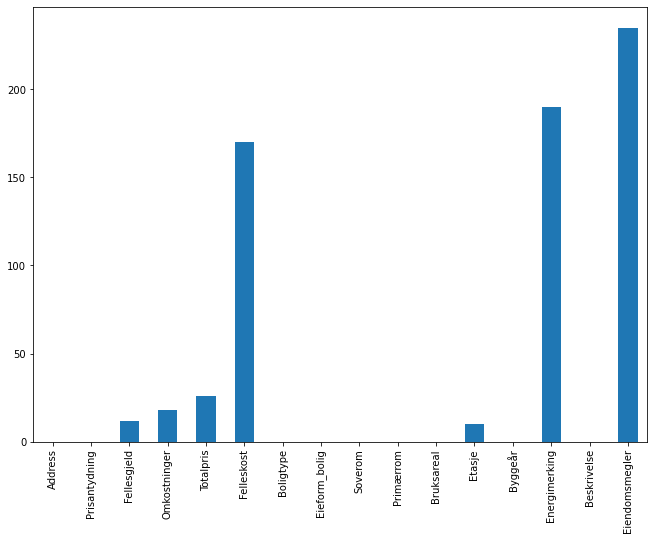

In [29]:
df.isna().sum().plot(kind = 'bar', figsize=(11,8))

In [30]:
# the data in these rows are in a good shape, except for Etasje. To avoid deleting these rows
# I will just fill these empty values with Replace by most frequent value, which is the second floor

#df['Etasje'].value_counts() 

df['Etasje'].fillna(value = '2', inplace = True)

In [31]:
# df[df['Etasje'].isna()]

In [32]:
df.isna().sum()

Address             0
Prisantydning       0
Fellesgjeld        12
Omkostninger       18
Totalpris          26
Felleskost        170
Boligtype           0
Eieform_bolig       0
Soverom             0
Primærrom           0
Bruksareal          0
Etasje              0
Byggeår             0
Energimerking     190
Beskrivelse         0
Eiendomsmegler    235
dtype: int64

In [33]:
df[df['Totalpris'].isna()]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
260,"Gladengveien 3, D2-303, 0661 Oslo",7 250 000 kr,NaN,NaN,NaN,NaN,83 m²,89 m²,2,3,3.,1,Leilighet,NaN,"""LOCUS"" ENSJØ - Flott, romslig 3 roms på 89 m2...",DNB Eiendom AS
291,"Sognaveien 10B toppleilighet (6. etg), 3404 Lier",5 500 000 kr,3 308 kr,4 900 kr per år,NaN,NaN,Leilighet,Eier (Selveier),3,129 m²,133 m²,2018,B - rød,NaN,LIER - Ny lekker 4-roms toppleilighet i modern...,Dialog Eiendomsmegling AS avd Drammen
97,"Michael Berentsens gate 4, 4014 Stavanger",3 500 000 kr,96 520 kr,3 596 520 kr,NaN,NaN,Leilighet,Eier (Selveier),2,89 m²,89 m²,1919,G - rød,NaN,Attraktiv leilighet over to plan - Renovert i ...,EIE eiendomsmegling - Espen Eide & Partnere AS
749,"Latinskolegata 6, 6004 Ålesund",1 650 000 kr,2 057 kr,NaN,NaN,NaN,Leilighet,Eier (Selveier),2,48 m²,48 m²,4,1918,F - rød,BUD MOTTATT-Pen 3-roms selveierleilighet i Åle...,EIE eiendomsmegling Ålesund
137,"Gymnasvegen 28, 3550 Gol",2 390 000 kr,61 150 kr,2 451 150 kr,NaN,NaN,Leilighet,Eier (Selveier),3,92 m²,94 m²,2017.0,3,NaN,"Romslig leilighet, midt i Gol sentrum med 3 so...",EiendomsMegler 1 Fjellmegleren
276,"Sølysttunet, 4077 Hundvåg",12 900 000 kr,NaN,NaN,NaN,NaN,142 m²,149 m²,3,3,4.,1,Leilighet,NaN,Sølyst - Stor toppleilighet på ca. 149kvm med ...,EiendomsMegler 1 Nybygg Forus
738,"Nedre Hjelmeset 5 C, 6091 Fosnavåg",2 100 000 kr,53 670 kr,2 153 670 kr,NaN,NaN,Leilighet,Eier (Selveier),2,80 m²,80 m²,2,1998,E - rød,Pen leilighet beliggende i 2. etasje | 2 sover...,EiendomsMegler 1 avd. Søre Sunnmøre
611,"Rønningstrand, 7120 Leksvik",2 890 000 kr,1 826 kr,NaN,NaN,NaN,Leilighet,Eier (Selveier),2,98 m²,98 m²,2,2019,NaN,Flotte leiligheter for salg | Ingen boplikt | ...,Heimdal Eiendomsmegling AS avd Heimdal
525,"Thorvald Olsens gate 6, 1396 Billingstad",5 800 000 kr,NaN,NaN,NaN,NaN,88 m²,91 m²,2,3,1.,4,Leilighet,NaN,Bergerløkka - 3-roms endeleilighet med mark-te...,JM Norge Oslo
119,"Resalg Sjøhagen Brygge A32, 1538 Moss",4 700 000 kr,3 000 kr,NaN,NaN,NaN,Leilighet,Eier (Selveier),2,65.6 m²,66.4 m²,3.0,2021,NaN,Sjøhagen Brygge / 3-roms selveierleilighet i 3...,Meglergaarden & Partners


In [34]:
# I will remove all the cells that has less than 13 non NaN values 
df.dropna(thresh = 13, inplace = True)
df.shape

(709, 16)

In [35]:
df[df['Totalpris'].isna()]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
291,"Sognaveien 10B toppleilighet (6. etg), 3404 Lier",5 500 000 kr,3 308 kr,4 900 kr per år,NaN,NaN,Leilighet,Eier (Selveier),3,129 m²,133 m²,2018,B - rød,NaN,LIER - Ny lekker 4-roms toppleilighet i modern...,Dialog Eiendomsmegling AS avd Drammen
97,"Michael Berentsens gate 4, 4014 Stavanger",3 500 000 kr,96 520 kr,3 596 520 kr,NaN,NaN,Leilighet,Eier (Selveier),2,89 m²,89 m²,1919,G - rød,NaN,Attraktiv leilighet over to plan - Renovert i ...,EIE eiendomsmegling - Espen Eide & Partnere AS
749,"Latinskolegata 6, 6004 Ålesund",1 650 000 kr,2 057 kr,NaN,NaN,NaN,Leilighet,Eier (Selveier),2,48 m²,48 m²,4,1918,F - rød,BUD MOTTATT-Pen 3-roms selveierleilighet i Åle...,EIE eiendomsmegling Ålesund
137,"Gymnasvegen 28, 3550 Gol",2 390 000 kr,61 150 kr,2 451 150 kr,NaN,NaN,Leilighet,Eier (Selveier),3,92 m²,94 m²,2017.0,3,NaN,"Romslig leilighet, midt i Gol sentrum med 3 so...",EiendomsMegler 1 Fjellmegleren
738,"Nedre Hjelmeset 5 C, 6091 Fosnavåg",2 100 000 kr,53 670 kr,2 153 670 kr,NaN,NaN,Leilighet,Eier (Selveier),2,80 m²,80 m²,2,1998,E - rød,Pen leilighet beliggende i 2. etasje | 2 sover...,EiendomsMegler 1 avd. Søre Sunnmøre
305,"Stadion 17, 1671 Kråkerøy",3 400 000 kr,1 594 kr,7 219 kr per år,NaN,NaN,Leilighet,Eier (Selveier),1,41 m²,4,2020,Eiet,NaN,Ny og lekker studioleilighet med rå utsikt lan...,Møller & Partners
549,"Jernbanegata 3, 4340 Bryne",1 490 000 kr,48 792 kr,1 538 792 kr,NaN,NaN,Leilighet,Eier (Selveier),1,58 m²,58 m²,2,1890,G - rød,Leilighet i Bryne sentrum med gangavstand til ...,Privatmegleren Jæren
273,"Bråtasvingen 19, 3425 Reistad",3 990 000 kr,3 428 kr,5 715 kr per år,NaN,NaN,Leilighet,Eier (Selveier),3,88 m²,92 m²,3,2007,D - rød,Pen 3(4)-roms endeleilighet med tilbaketrukket...,Proaktiv Bolig og Prosjektmegling
210,"Nordalsvegen 3, 7540 Klæbu",3 750 000 kr,2 466 kr,NaN,NaN,NaN,Leilighet,Eier (Selveier),2,75 m²,80 m²,3,2017,C - mørkegrønn,Romslig 3-romsleilighet fra 2017 midt i Klæbu ...,Proaktiv Eiendomsmegling avd. Heimdal


In [36]:
filt = (df['Totalpris'].isnull())

In [37]:
# replace NaN valuewith string 0 to be able to compare values later on
df.loc[filt, 'Omkostninger'] = df.loc[filt, 'Omkostninger'].fillna('0') 

In [38]:
# if the Omkostninger is higher than Prisantydning, then the Omkostninger is most likely the value of Totalpris,
# if not consider the Prisantydning as the Totalpris
df.loc[filt,'Totalpris'] = df.loc[filt].apply(lambda x : x['Omkostninger'] if x['Omkostninger'] > x['Prisantydning'] else x['Prisantydning'], axis = 1)

In [39]:
# the Omkostninger values in these rows belong to Felleskost, because Omkostninger is not paid yearly, but Felleskost
# can be that, but it's still paid monthly

filt = (df['Omkostninger'].str.contains('år'))
display(df.loc[filt])


# from Omkostninger --> Felleskost for these cells

df.loc[filt,'Felleskost'] = df.loc[filt,'Omkostninger']
df.loc[filt,'Omkostninger'] = '0'
display(display(df.loc[filt]))

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
291,"Sognaveien 10B toppleilighet (6. etg), 3404 Lier",5 500 000 kr,3 308 kr,4 900 kr per år,5 500 000 kr,NaN,Leilighet,Eier (Selveier),3,129 m²,133 m²,2018,B - rød,NaN,LIER - Ny lekker 4-roms toppleilighet i modern...,Dialog Eiendomsmegling AS avd Drammen
305,"Stadion 17, 1671 Kråkerøy",3 400 000 kr,1 594 kr,7 219 kr per år,7 219 kr per år,NaN,Leilighet,Eier (Selveier),1,41 m²,4,2020,Eiet,NaN,Ny og lekker studioleilighet med rå utsikt lan...,Møller & Partners
273,"Bråtasvingen 19, 3425 Reistad",3 990 000 kr,3 428 kr,5 715 kr per år,5 715 kr per år,NaN,Leilighet,Eier (Selveier),3,88 m²,92 m²,3,2007,D - rød,Pen 3(4)-roms endeleilighet med tilbaketrukket...,Proaktiv Bolig og Prosjektmegling


,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
291,"Sognaveien 10B toppleilighet (6. etg), 3404 Lier",5 500 000 kr,3 308 kr,0,5 500 000 kr,4 900 kr per år,Leilighet,Eier (Selveier),3,129 m²,133 m²,2018,B - rød,NaN,LIER - Ny lekker 4-roms toppleilighet i modern...,Dialog Eiendomsmegling AS avd Drammen
305,"Stadion 17, 1671 Kråkerøy",3 400 000 kr,1 594 kr,0,7 219 kr per år,7 219 kr per år,Leilighet,Eier (Selveier),1,41 m²,4,2020,Eiet,NaN,Ny og lekker studioleilighet med rå utsikt lan...,Møller & Partners
273,"Bråtasvingen 19, 3425 Reistad",3 990 000 kr,3 428 kr,0,5 715 kr per år,5 715 kr per år,Leilighet,Eier (Selveier),3,88 m²,92 m²,3,2007,D - rød,Pen 3(4)-roms endeleilighet med tilbaketrukket...,Proaktiv Bolig og Prosjektmegling


None

In [40]:
df.isna().sum()

Address             0
Prisantydning       0
Fellesgjeld         0
Omkostninger        0
Totalpris           0
Felleskost        150
Boligtype           0
Eieform_bolig       0
Soverom             0
Primærrom           0
Bruksareal          0
Etasje              0
Byggeår             0
Energimerking     176
Beskrivelse         0
Eiendomsmegler    230
dtype: int64

In [52]:
df['Felleskost'].fillna(value = '0', inplace = True)
filt = (df['Felleskost'].str.contains('år'))
display(df.loc[filt])

In [61]:
# remove kr from Prisantydning, Fellesgjeld, Omkostninger, Totalpris, Felleskost
df['Prisantydning'] = df['Prisantydning'].apply(lambda x: x.replace('per år','').replace('kr','').replace(' ','').strip())
df['Fellesgjeld'] = df['Fellesgjeld'].apply(lambda x: x.replace('per år','').replace('kr','').replace(' ','').strip())
df['Omkostninger'] = df['Omkostninger'].apply(lambda x: x.replace('per år','').replace('kr','').replace(' ','').strip())
df['Totalpris'] = df['Totalpris'].apply(lambda x: x.replace('per år','').replace('kr','').replace(' ','').strip())
df['Felleskost'] = df['Felleskost'].apply(lambda x: x.replace('per år','').replace('kr','').replace(' ','').strip())

In [62]:
df.columns

Index(['Address', 'Prisantydning', 'Fellesgjeld', 'Omkostninger', 'Totalpris',
       'Felleskost', 'Boligtype', 'Eieform_bolig', 'Soverom', 'Primærrom',
       'Bruksareal', 'Etasje', 'Byggeår', 'Energimerking', 'Beskrivelse',
       'Eiendomsmegler'],
      dtype='object')

In [63]:
df['Prisantydning'].unique()

array(['2590000', '2890000', '2200000', '5400000', '4500000', '3910000',
       '2280000', '1000000', '3750000', '4900000', '3200000', '3790000',
       '5950000', '1750000', '4000000', '4700000', '3700000', '1670000',
       '2990000', '2750000', '2810000', '1700000', '3000000', '1800000',
       '3490000', '1470000', '4190000', '3590000', '2600000', '1360000',
       '1300000', '1650000', '5000000', '6800000', '2490000', '5130000',
       '900000', '2950000', '4450000', '2090000', '3500000', '3290000',
       '2450000', '2050000', '1890000', '3980000', '2190000', '7950000',
       '1690000', '850000', '750000', '5500000', '3450000', '4790000',
       '4999000', '4490000', '2080000', '3990000', '3800000', '3650000',
       '5890000', '7490000', '3550000', '1950000', '3325000', '3250000',
       '5430000', '4750000', '6700000', '4950000', '2500000', '3350000',
       '2780000', '4200000', '4850000', '6975000', '5200000', '6400000',
       '2550000', '1200000', '1450000', '2000000', '26

In [64]:
df['Prisantydning'].astype(int)
df['Fellesgjeld'].astype(int)
df['Omkostninger'].astype(int)
df['Totalpris'].astype(int)
df['Felleskost'].astype(int)

450    5886
33        0
728    2000
37     5506
449    3683
       ... 
824    6147
827    5015
829    3950
833    5175
836    6075
Name: Felleskost, Length: 709, dtype: int32

In [65]:
df.isna().sum()

Address             0
Prisantydning       0
Fellesgjeld         0
Omkostninger        0
Totalpris           0
Felleskost          0
Boligtype           0
Eieform_bolig       0
Soverom             0
Primærrom           0
Bruksareal          0
Etasje              0
Byggeår             0
Energimerking     176
Beskrivelse         0
Eiendomsmegler    230
dtype: int64